In [12]:
import os
import sys

def add_subfolders_to_path(folder_path):
    for root, dirs, _ in os.walk(folder_path):
        for dir_name in dirs:
            full_path = os.path.join(root, dir_name)
            sys.path.append(full_path)  # Or use sys.path.insert(0, full_path)
# Usage:
os.chdir('..\\')
folder_to_add = './'
add_subfolders_to_path(folder_to_add)

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from src.dataloader import *
from src.utils import *

# Data loading

In [22]:
train_dir = r"data\trainset"
test_dir = r"data\testset"
df_train_path = r"data\trainset\trainset_true.csv"
df_test_path = r"data\testset\testset_data.csv"

df_train, df_test = load_dataframes(df_train_path, df_test_path)

display(df_train.head())
display(df_test.head())

,ID,LABEL,GENDER,DOB,LYMPH_COUNT,AGE
0,P26,1,0,11/3/1933,11.2,87
1,P183,1,0,5/15/1942,12.8,78
2,P89,1,0,6/19/1935,9.6,85
3,P123,1,0,1/27/1931,122.6,89
4,P61,1,1,3/5/1931,11.6,89


,ID,LABEL,GENDER,DOB,LYMPH_COUNT,AGE
0,P71,-1,0,1/17/1946,5.76,74
1,P16,-1,0,3/5/1940,32.00,80
2,P114,-1,0,6/16/1929,4.60,91
3,P170,-1,0,11/3/1933,4.80,87
4,P98,-1,1,5/14/1970,6.24,50


# Data exploration

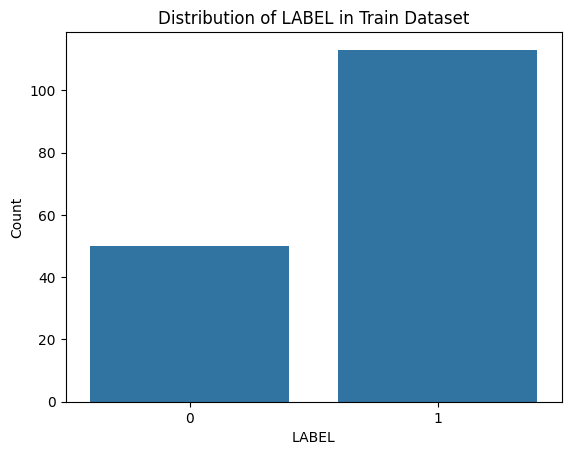

In [26]:
# Distribution of the attribute LABEL in the training set
sns.countplot(data=df_train, x='LABEL')
plt.xlabel('LABEL')
plt.ylabel('Count')
plt.title('Distribution of LABEL in Train Dataset')
plt.show()


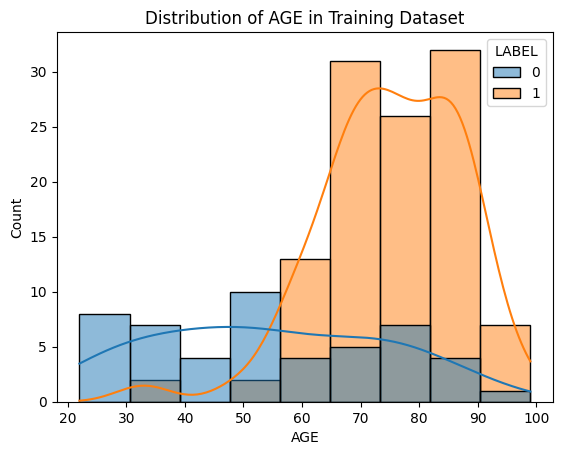

In [27]:
# Distribution of the attribute AGE in the training set
sns.histplot(data=df_train, x='AGE', hue='LABEL', kde=True)
plt.xlabel('AGE')
plt.ylabel('Count')
plt.title('Distribution of AGE in Training Dataset')
plt.show()


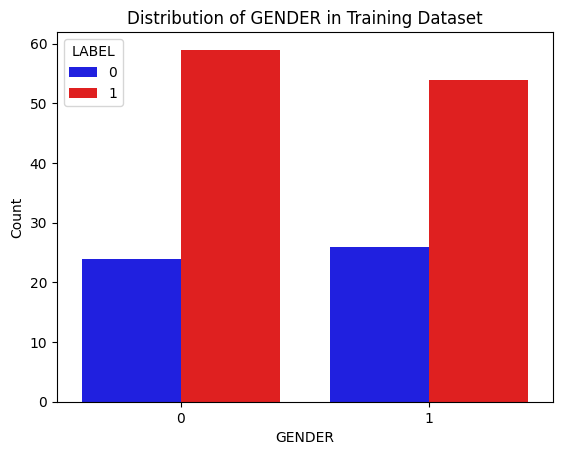

In [28]:
sns.countplot(data=df_train, x='GENDER', hue='LABEL', palette={0: 'blue', 1: 'red'})
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.title('Distribution of GENDER in Training Dataset')
plt.show()


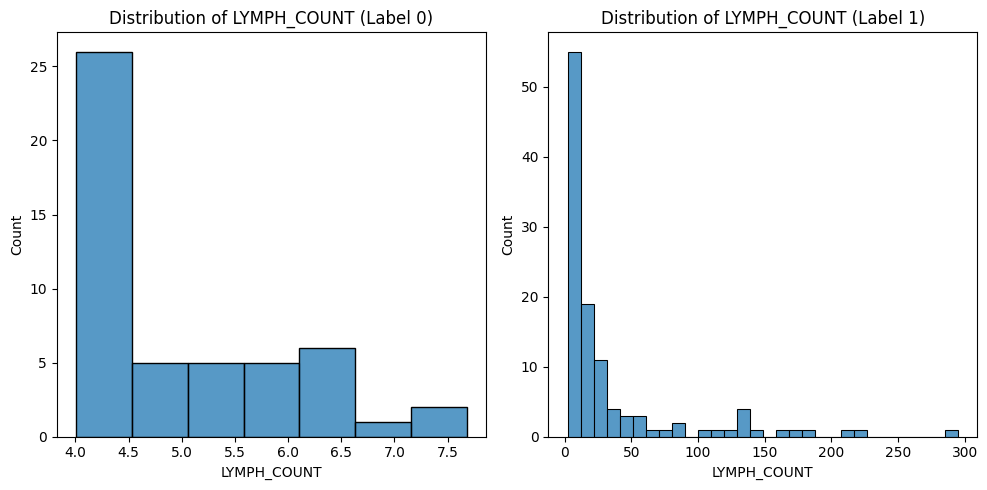

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot for label 0
sns.histplot(data=df_train[df_train['LABEL'] == 0], x='LYMPH_COUNT', ax=axes[0])
axes[0].set_xlabel('LYMPH_COUNT')
axes[0].set_ylabel('Count')
axes[0].set_title('Distribution of LYMPH_COUNT (Label 0)')

# Plot for label 1
sns.histplot(data=df_train[df_train['LABEL'] == 1], x='LYMPH_COUNT', ax=axes[1])
axes[1].set_xlabel('LYMPH_COUNT')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of LYMPH_COUNT (Label 1)')

plt.tight_layout()
plt.show()


# Visualization of the images

In [50]:
def train_val_dataset(df, bags_dir, train_transforms=None, val_transforms=None, val_split=0.25):
    df_copy = df.copy()
    # if age > 65, set label to 1
    df_copy['AGE'] = df_copy['AGE'].apply(lambda x: int(x>65))
    train_idx, val_idx = train_test_split(list(range(len(df))), test_size=val_split, stratify = df_copy[['LABEL', 'GENDER', 'AGE']])
    train_set = LymphBags(bags_dir, df, indices = train_idx, transforms=train_transforms,max_seq_len=198)
    val_set = LymphBags(bags_dir, df, indices = val_idx, transforms=val_transforms,max_seq_len=198)
    return train_set, val_set


In [87]:
from torch.utils.data import DataLoader
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transforms_val = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

trainset, valset = train_val_dataset(df_train, train_dir, transforms_train, transforms_val, val_split=0.2)
train_loader = DataLoader(trainset, batch_size=6, shuffle=True)
val_loader = DataLoader(valset, batch_size=6, shuffle=False)

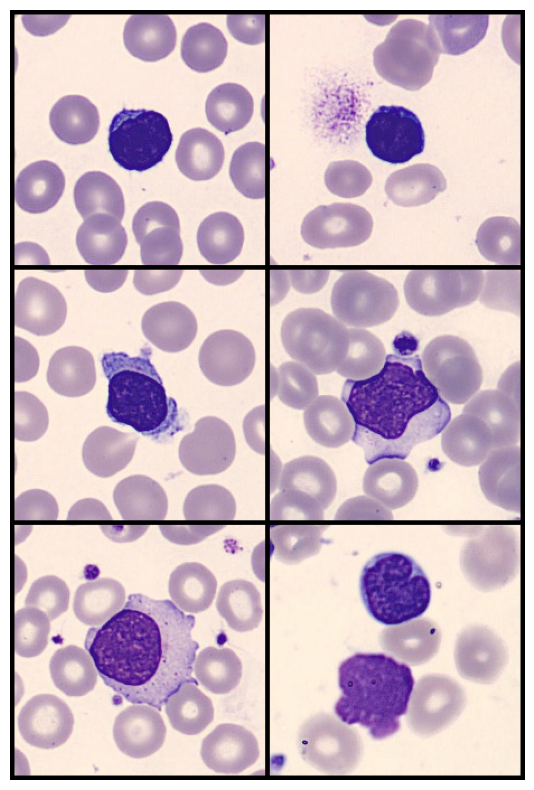

In [90]:
import matplotlib.pyplot as plt
import torchvision.utils as vutils

images, gender, count, age, labels = next(iter(train_loader))
first_images = images[:, 0]
grid = vutils.make_grid(first_images, nrow=2, padding=4, normalize=True)
grid = grid.permute(1, 2, 0).cpu().numpy()

# Plot the grid of images
plt.figure(figsize=(10, 10))
plt.imshow(grid)
plt.axis('off')

plt.show()
